<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [16]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install pandas
!pip install requests
!pip install plotly
!pip install html5lib
!pip install matplotlib

In [44]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [45]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [46]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [47]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [48]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [49]:
datos_tesla=tesla.history(period="max")
datos_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-11 00:00:00-04:00,251.839996,257.739990,241.360001,252.309998,128948100,0.0,0.0
2025-04-14 00:00:00-04:00,258.359985,261.799988,245.929993,252.350006,100135200,0.0,0.0
2025-04-15 00:00:00-04:00,249.910004,258.750000,247.539993,254.110001,79594300,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [123]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [57]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data_html=requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [60]:
beautiful_soup = BeautifulSoup(data_html, "html.parser")


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [73]:
import pandas as pd
!pip install lxml

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Extraer todas las tablas
tables = pd.read_html(url)

# Buscar la tabla que contiene 'Tesla Revenue'
for table in tables:
    if 'Tesla Revenue' in table.columns or any('Tesla' in str(col) and 'Revenue' in str(col) for col in table.columns):
        tesla_revenue = table
        break

# Renombrar columnas si es necesario
tesla_revenue.columns = ['Date', 'Revenue']

# Ver las primeras filas
print(tesla_revenue.head())


   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [74]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [75]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [122]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(tesla_url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
tables = pd.read_html(str(soup))
tesla_revenue = tables[1]
tesla_revenue.tail()


,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
58,2010-06-30,$28
59,2010-03-31,$21
60,2009-12-31,NaN
61,2009-09-30,$46
62,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [79]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [80]:
datos_gme=GameStop.history(period="max")
datos_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-11 00:00:00-04:00,25.500000,26.440001,25.250000,26.400000,10984100,0.0,0.0
2025-04-14 00:00:00-04:00,26.660000,27.180000,25.680000,26.980000,10628400,0.0,0.0
2025-04-15 00:00:00-04:00,26.879999,27.379999,26.620001,26.700001,6738100,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [81]:
datos_gme.reset_index(inplace=True)
datos_gme.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [82]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
datos_html=requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [84]:
beautiful_soup = BeautifulSoup(datos_html,"html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [93]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
datos_html = requests.get(url).text
beautiful_soup = BeautifulSoup(datos_html, "html.parser")

tablas = beautiful_soup.find_all('table')
indice_tabla = None

for indice, tabla in enumerate(tablas):
    if ("GameStop Quarterly Revenue" in str(tabla)):
        indice_tabla = indice
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if indice_tabla is not None:
    tabla_gme = tablas[indice_tabla]
    tbody = tabla_gme.find('tbody')
    if tbody:
        for linea in tbody.find_all("tr"):
            col = linea.find_all("td")
            if len(col) == 2:
                fecha = col[0].text
                ingresos = col[1].text.replace("$", "").replace(",", "")
                # Crear un nuevo DataFrame con la fila y luego concatenar
                nueva_fila = pd.DataFrame([{'Date': fecha, 'Revenue': ingresos}])
                gme_revenue = pd.concat([gme_revenue, nueva_fila], ignore_index=True)
    else:
        # Si no hay tbody, intentar directamente con las filas de la tabla
        for linea in tabla_gme.find_all("tr"):
            col = linea.find_all("td")
            if len(col) == 2:
                fecha = col[0].text
                ingresos = col[1].text.replace("$", "").replace(",", "")
                # Crear un nuevo DataFrame con la fila y luego concatenar
                nueva_fila = pd.DataFrame([{'Date': fecha, 'Revenue': ingresos}])
                gme_revenue = pd.concat([gme_revenue, nueva_fila], ignore_index=True)

print(gme_revenue.head())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [95]:
last_five_rows = gme_revenue.tail(5)

# Print the last 5 rows
print("Last 5 rows of the gme_revenue DataFrame:")
print(last_five_rows)

Last 5 rows of the gme_revenue DataFrame:
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


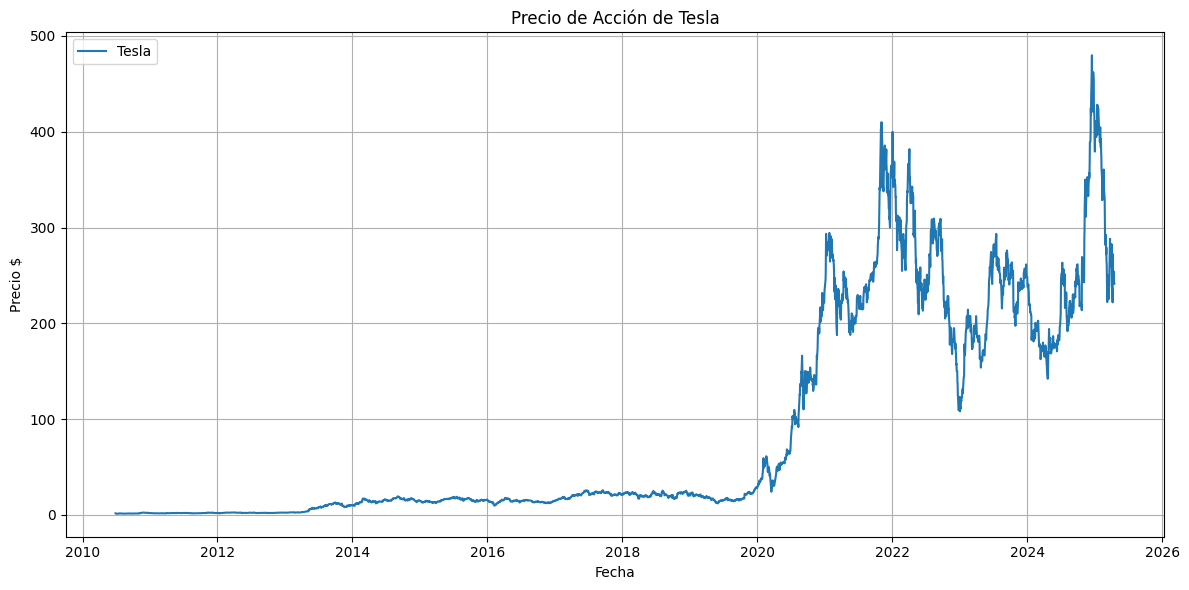

In [130]:
import matplotlib.pyplot as plt
make_graph(datos_tesla, ingresos_tesla, 'Tesla')

def make_graph(stock_data, revenue_data, stock):
    plt.figure(figsize=(12, 6))
    if stock_data is not None and 'Date' in stock_data.columns and 'Close' in stock_data.columns:
        plt.plot(stock_data['Date'], stock_data['Close'], label=stock)
        plt.xlabel("Fecha")
        plt.ylabel("Precio $")
        plt.legend()
        plt.grid(True)
    plt.title(f"Precio de Acción de {stock}")
    plt.tight_layout()
    plt.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


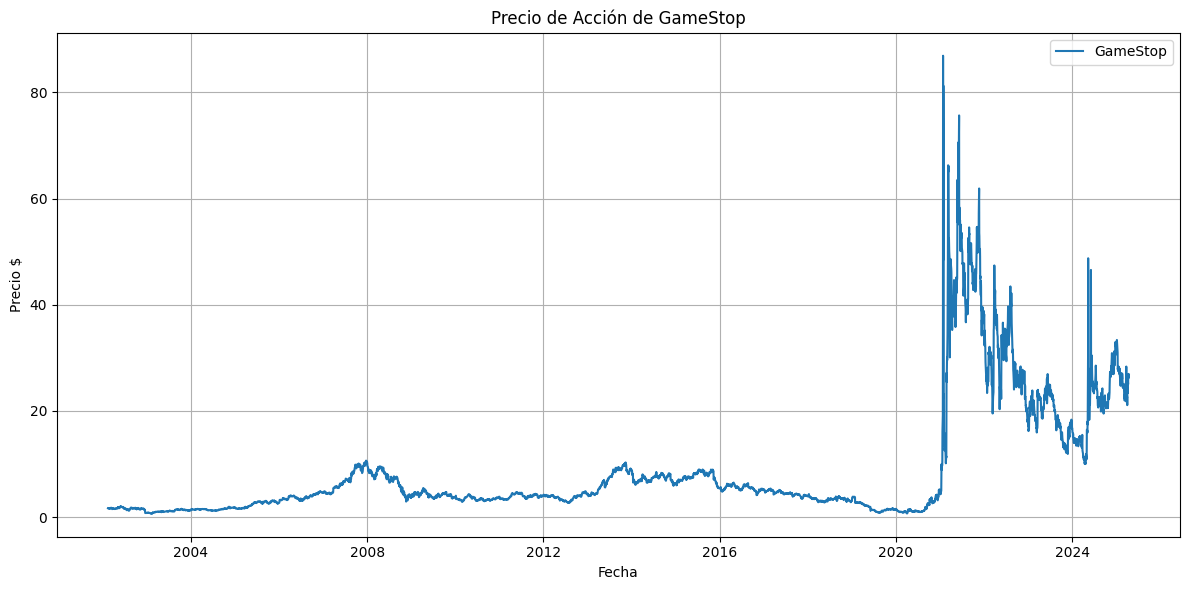

In [131]:
make_graph(datos_gme, ingresos_gme, 'GameStop')

def make_graph(stock_data, revenue_data, stock):
    plt.figure(figsize=(12, 6))
    if stock_data is not None and 'Date' in stock_data.columns and 'Close' in stock_data.columns:
        plt.plot(stock_data['Date'], stock_data['Close'], label=stock)
        plt.xlabel("Fecha")
        plt.ylabel("Precio $")
        plt.legend()
        plt.grid(True)
    plt.title(f"Precio de Acción de {stock}")
    plt.tight_layout()
    plt.show()

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
